# **Project Name**    - 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member  - Saurabh Sharma** 

# **Project Summary -**

In this project, we conducted unsupervised clustering of a Zomato restaurant dataset using three popular algorithms: K-means, Agglomerative Clustering, and DBSCAN. Along with the clustering analysis, we also performed sentiment analysis on the dataset. There are two datasets included features such as cuisine types, ratings, reviews, costs, and sentiments, which allowed us to gain insights into customer opinions and preferences.

To perform sentiment analysis, we utilized natural language processing techniques. We processed the textual data by tokenizing the reviews, removing stop words, and applying techniques like stemming or lemmatization to normalize the words. This preprocessing step ensured that we were working with clean and meaningful data.

We then employed sentiment analysis algorithms to determine the sentiment polarity of each review, indicating whether it was positive, negative, or neutral. This information was particularly valuable in understanding customer sentiments towards different restaurants and cuisines. By incorporating sentiment analysis into our clustering analysis, we were able to identify clusters of restaurants that shared similar sentiments among their customers.

The sentiment analysis results were encoded as features in our dataset, enabling us to consider sentiment as an additional factor for clustering. This allowed us to explore if restaurants with similar sentiments would cluster together, potentially indicating shared characteristics or customer experiences.

We integrated the sentiment analysis results with the clustering algorithms by including sentiment features in the input data. This enabled us to analyze and visualize the clusters while taking sentiment into account. By incorporating sentiment analysis, we aimed to gain a more comprehensive understanding of the restaurant dataset and uncover patterns related to both objective features (e.g., cuisine types) and subjective aspects (e.g., sentiments).

The sentiment analysis outcomes were assessed through visualizations, such as scatter plots or bar graphs, to observe the distribution of sentiments across the dataset. Additionally, we evaluated the performance of the clustering algorithms in capturing sentiment-based patterns by comparing the clustering results with and without sentiment features.

The sentiment analysis added an extra layer of information and context to the clustering analysis, allowing us to delve deeper into customer preferences and satisfaction levels. By combining sentiment analysis with unsupervised clustering, we were able to uncover meaningful insights about the dataset and gain a comprehensive understanding of the restaurant landscape.

In conclusion, this project showcased the integration of sentiment analysis with unsupervised clustering techniques to gain insights from a restaurant dataset. The sentiment analysis provided valuable information about customer sentiments, which was incorporated into the clustering analysis to uncover sentiment-based patterns and clusters. The combination of sentiment analysis and clustering allowed us to explore the subjective aspects of the dataset and gain a holistic understanding of customer preferences and opinions in the restaurant industry.

# **GitHub Link -**

https://github.com/Saurabhshrma/Zomato-Restaurant-Clustering-and-Sentiment-Analysis

# **Problem Statement**


This project focuses on analysing the Zomato restaurant data for each city in India.
The Project focuses on Customers and Company, We have to analyze the sentiments of the reviews given by the customer in the data and cluster the zomato restaurants into different segments. 

## ***1. Know Your Data***

### Import Libraries

In [206]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud, STOPWORDS
import scipy.stats as stats
import re
from textblob import TextBlob



### Dataset Loading

In [111]:
# Load Dataset
restaurant_data = pd.read_csv('Zomato Restaurant names and Metadata.csv')
review_data = pd.read_csv('Zomato Restaurant reviews.csv')

### Dataset First View

In [71]:
# Dataset First Look
restaurant_data.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [72]:
review_data.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [156]:
review_data[review_data['Reviewer'] == 'Dileep']

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Date
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,2019-05-24
329,Shah Ghouse Hotel & Restaurant,Dileep,Perfect place to order for mutton Biryani and ...,4.0,"1 Review , 1 Follower",2019-05-03 23:31:00,0,2019-05-03
4801,Udipi's Upahar,Dileep,Good south Indian breakfast items .. u can try...,4.0,"3 Reviews , 1 Follower",2019-05-04 19:03:00,0,2019-05-04


### Dataset Rows & Columns count

In [73]:
# Dataset Rows & Columns count
restaurant_data.shape

(105, 6)

In [74]:
review_data.shape

(10000, 7)

### Dataset Information

In [12]:
# Dataset Info
restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [13]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [75]:
# Dataset Duplicate Value Count

for columns in restaurant_data.columns:
    print(columns ,":",restaurant_data[columns].duplicated().sum())

Name : 0
Links : 0
Cost : 76
Collections : 62
Cuisines : 13
Timings : 27


In [76]:
# Dataset2 Duplicate Value Count

for columns in review_data.columns:
    print(columns ,":",review_data[columns].duplicated().sum())

Restaurant : 9900
Reviewer : 2553
Review : 635
Rating : 9989
Metadata : 7522
Time : 217
Pictures : 9964


#### Missing Values/Null Values

In [77]:
# Missing Values/Null Values Count
null_counts = restaurant_data.isnull().sum()
null_counts

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [78]:
null_count = review_data.isnull().sum()
null_count

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

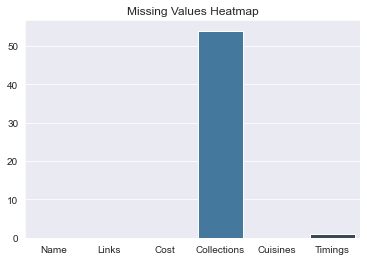

In [29]:
# Visualizing the missing values

sns.set_style('darkgrid')

sns.barplot(x=null_counts.index, y=null_counts.values, palette='Blues_d')
plt.title('Missing Values Heatmap')
plt.show()

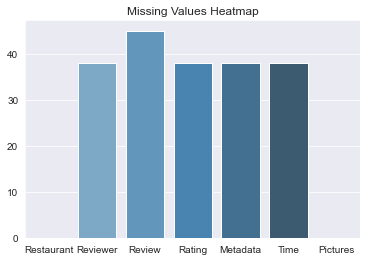

In [30]:
# Visualizing the missing values

sns.set_style('darkgrid')

sns.barplot(x=null_count.index, y=null_count.values, palette='Blues_d')
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

We have 2 datasets , First contains restaurant and its details , other one contains restaurant and reviews. We have name first dataset as restaurant_data and second one as review_data.

restaurant_data have 105 rows and 6 columns named Name,Links,Cost,Collections,Cuisines,Timings.

review_data have 10000 rows and 7 column named Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures.

'Restaurant' and 'Name' columns are connector in these two datasets.

In restaurant_data there are 54 null values in Collection. and in review_data there are 45 null values in review.



## ***2. Understanding Your Variables***

In [31]:
# Dataset Columns
restaurant_data.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [32]:
review_data.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [33]:
# Dataset Describe
restaurant_data.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


### Variables Description 

**restaurant_data**


Name         :  Name of Restaurants 

Links        :  URL Links of Restaurants

Cost         :  Per person estimated cost of dining

Collection   :  Tagging of Restaurants w.r.t. Zomato categories

Cuisines     :  Cuisines served by restaurants

Timings      :  Restaurant timings



**review_data**


Restaurant           :  Name of Restaurants

Reviewer             :  Name of the reviewer

review               :  Review text

Rating               :  Rating provided

MetaData             :  Reviewer metadata-No of reviews and followers

Time                 :  Date and Time of Review

Pictures             :  No of pictures posted with review.


### Check Unique Values for each variable.

In [79]:
# Check Unique Values for each variable.

for columns in restaurant_data.columns:
    print(columns ,":",restaurant_data[columns].nunique())

Name : 105
Links : 105
Cost : 29
Collections : 42
Cuisines : 92
Timings : 77


In [80]:
# Check Unique Values for each variable.

for columns in review_data.columns:
    print(columns ,":",review_data[columns].nunique())

Restaurant : 100
Reviewer : 7446
Review : 9364
Rating : 10
Metadata : 2477
Time : 9782
Pictures : 36


## 3. ***Data Wrangling***

### Data Wrangling Code

In [114]:
# Convert the "Cost" column in the restaurant data to numeric
restaurant_data['Cost'] = restaurant_data['Cost'].str.replace(',', '').astype(float)

In [116]:
# Convert the "Rating" column to numeric
review_data['Rating'] = pd.to_numeric(review_data['Rating'])

In [118]:
# Convert the "Time" column to datetime
review_data['Time'] = pd.to_datetime(review_data['Time'], format='%m/%d/%Y %H:%M')

In [119]:
# Find the minimum and maximum values of the "Time" column
min_time = review_data['Time'].min()
max_time = review_data['Time'].max()

# Print the results
print("Minimum Time:", min_time)
print("Maximum Time:", max_time)

Minimum Time: 2016-05-31 16:41:00
Maximum Time: 2019-05-25 20:23:00


In [120]:
# Deriving a new column named "Date" from "Time" column 

review_data['Date'] = review_data['Time'].dt.date
review_data['Date'] = pd.to_datetime(review_data['Date'], format='%Y/%m/%d')

In [131]:
# Merge the restaurant and review data

merged_data = pd.merge(restaurant_data, review_data, left_on='Name', right_on='Restaurant')
merged_data.shape

In [278]:
# Extract relevant information from the metadata column
# Getting the count of users who have posted many reviews or have many followers aka Food Critics

review_data['Review_Count'] = review_data['Metadata'].str.extract('(\d+) Reviews').astype(float)
review_data['Followers'] = review_data['Metadata'].str.extract('(\d+) Followers').astype(float)


# Define the criteria to identify critics
review_count_threshold = 100  # Minimum number of reviews to be considered a critic
followers_threshold = 1000   # Minimum number of followers to be considered a critic


# Identify critics based on the criteria
review_data['Is_Critic'] = 0  # Initialize the column with 0
review_data.loc[(review_data['Review_Count'] >= review_count_threshold) | (review_data['Followers'] >= followers_threshold), 'Is_Critic'] = 1


# Print the number of critics identified
num_critics = review_data['Is_Critic'].sum()
print('Number of Critics:', num_critics)


Number of Critics: 790


In [281]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Restaurant    9954 non-null   object        
 1   Reviewer      9954 non-null   object        
 2   Review        9954 non-null   object        
 3   Rating        9954 non-null   float64       
 4   Metadata      9954 non-null   object        
 5   Time          9954 non-null   datetime64[ns]
 6   Pictures      9954 non-null   int64         
 7   Date          9954 non-null   datetime64[ns]
 8   Review_Count  7472 non-null   float64       
 9   Followers     6747 non-null   float64       
 10  Is_Critic     9954 non-null   int64         
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 1.2+ MB


### What all manipulations have you done and insights you found?

1. Type Conversions 

    restaurant_data 'Cost' column , converted it to float datatype.

    review_data 'Rating' column , converted it to float datatype.

    review_data 'Time' column , converted it to datetime.
    

2. Derived 'Date' column from review_data['Time']


3. Joined restaurant_data and review_data to get a new dataframe named 'merged_data' joined on restaurant and name.


4. We found our dataset contains data from 2016 May till 2019 May.


5. We also idetified food critics in review_data['metadata'] , people with high followers and reviews count considered as critics.


## ***4. Feature Engineering & Data Pre-processing***

###  Handling Missing Values

In [282]:
# Fill NaN values in review count and followers columns with 0
review_data['Review_Count'].fillna(0, inplace=True)
review_data['Followers'].fillna(0, inplace=True)


In [283]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Restaurant    9954 non-null   object        
 1   Reviewer      9954 non-null   object        
 2   Review        9954 non-null   object        
 3   Rating        9954 non-null   float64       
 4   Metadata      9954 non-null   object        
 5   Time          9954 non-null   datetime64[ns]
 6   Pictures      9954 non-null   int64         
 7   Date          9954 non-null   datetime64[ns]
 8   Review_Count  9954 non-null   float64       
 9   Followers     9954 non-null   float64       
 10  Is_Critic     9954 non-null   int64         
dtypes: datetime64[ns](2), float64(3), int64(2), object(4)
memory usage: 1.2+ MB


In [284]:
# Print the number of critics identified
num_critics = review_data['Is_Critic'].sum()
print('Number of Critics:', num_critics)

Number of Critics: 790


In [112]:
# Drop rows with null values in the "review" column
review_data.dropna(subset=['Review'], inplace=True)


In [113]:
review_data.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [159]:
# checking null values in res
restaurant_data.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [160]:
# Drop the "Collections" column
restaurant_data = restaurant_data.drop("Collections", axis=1)

In [161]:
restaurant_data.isnull().sum()

Name        0
Links       0
Cost        0
Cuisines    0
Timings     1
dtype: int64

In [115]:
# Checking "Rating" distribution

review_data['Rating'].value_counts()

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [ ]:
# Handling Outliers & Outlier treatments

# Drop rows with 'Like' in the 'Rating' column
review_data = review_data.loc[~review_data['Rating'].str.contains('Like')]

#### What all missing value imputation techniques have you used and why did you use those techniques?

Replaced 'Nan' values present in 'Review_count' and 'Followers' of review_data dataset.

Dropped rows having'Nan' values present in 'Review' column of review_data dataset.

Dropped 'collections' column in restaurant_data as it contained around 50% null values.

review_data 'Rating' column contained one string type entry so we dropped that row.

### 5. Textual Data Preprocessing 


In [171]:
# copying the dataset 
df = review_data.copy()

# Converting the review to the simple text

def clean_text(text):
    
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # remove bit.ly links
    text = re.sub(r'bit.ly/\S+', '', text)
    
    # remove hashtags
    text = re.sub(r'#\w+', '', text)
    
    # remove mentions
    text = re.sub(r'@\w+', '', text)
    
    # remove non-alphanumeric characters
    text = re.sub(r'\W+', ' ', text)
    
    # convert to lowercase
    text = text.lower()
    
    # remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text
    

df['clean_review'] = df['Review'].apply(lambda x: clean_text(x))

In [188]:
pd.set_option('display.max_colwidth', None)

df[['Review','clean_review']].iloc[0]

Review          The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.
clean_review                the ambience was good food was quite good had saturday lunch which was cost effective good place for a sate brunch one can also chill with friends and or parents waiter soumen das was really courteous and helpful
Name: 0, dtype: object

####  Removing Stopwords 

In [198]:
# Removing Stopwords

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

df['tokens'] = df['clean_review'].apply(remove_stopwords)
df['tokens'] = df['tokens'].apply(lambda x: x.split())

In [199]:
pd.set_option('display.max_colwidth', None)

df[['Review','clean_review','tokens']].iloc[0]

Review          The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.
clean_review                the ambience was good food was quite good had saturday lunch which was cost effective good place for a sate brunch one can also chill with friends and or parents waiter soumen das was really courteous and helpful
tokens                                                     [ambience, good, food, quite, good, saturday, lunch, cost, effective, good, place, sate, brunch, one, also, chill, friends, parents, waiter, soumen, das, really, courteous, helpful]
Name: 0, dtype: object

#### 8. Text Normalization

In [204]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()

def lemmatize_token(token):
    return lemmatizer.lemmatize(token, pos='v') # 'v' specifies that the token is a verb


df['lemmatized'] = df['tokens'].apply(lambda x: ' '.join([lemmatize_token(token) for token in x]))


In [205]:
df[['Review','clean_review','tokens','lemmatized']].iloc[0]

Review          The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.
clean_review                the ambience was good food was quite good had saturday lunch which was cost effective good place for a sate brunch one can also chill with friends and or parents waiter soumen das was really courteous and helpful
tokens                                                     [ambience, good, food, quite, good, saturday, lunch, cost, effective, good, place, sate, brunch, one, also, chill, friends, parents, waiter, soumen, das, really, courteous, helpful]
lemmatized                                                                           ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parent waiter soumen das really courteous helpful
Name: 0, dtype: object

##### Which text normalization technique have you used and why?

We chose to use lemmatization because it produces more meaningful root forms of words compared to stemming, which simply removes the suffix of a word. This can help improve the accuracy of our sentiment analysis model.


In [219]:
# Perform sentiment analysis using TextBlob
df['Sentiment'] = df['lemmatized'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Map sentiment polarity to sentiment labels
df['Sentiment_Label'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')


In [220]:
df['Sentiment_Label'].value_counts()

Positive    7628
Negative    1761
Neutral      565
Name: Sentiment_Label, dtype: int64

In [235]:
# joining the two datasets

rest_sent = pd.merge(restaurant_data, df, left_on= 'Name',right_on ='Restaurant')
rest_sent.head(1)

,Name,Links,Cost,Cuisines,Timings,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Date,clean_review,tokens,lemmatized,Sentiment,Sentiment_Label
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavours-gachibowli,800.0,"Chinese, Continental, Kebab, European, South Indian, North Indian","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,2019-05-25,the ambience was good food was quite good had saturday lunch which was cost effective good place for a sate brunch one can also chill with friends and or parents waiter soumen das was really courteous and helpful,"[ambience, good, food, quite, good, saturday, lunch, cost, effective, good, place, sate, brunch, one, also, chill, friends, parents, waiter, soumen, das, really, courteous, helpful]",ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parent waiter soumen das really courteous helpful,0.66,Positive


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

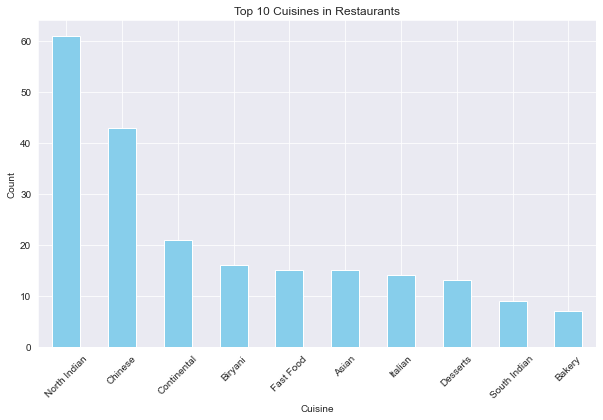

In [88]:
# Chart - 1 visualization code

# Visualization: Bar plot of restaurant cuisines

cuisine_counts = restaurant_data['Cuisines'].str.split(', ').explode().value_counts().head(10)
plt.figure(figsize=(10, 6))
cuisine_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cuisines in Restaurants')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

I picked a bar plot for visualizing the top 10 cuisines in restaurants because it effectively displays the frequency or count of each cuisine category in a clear and concise manner. The bar plot allows us to compare the counts of different cuisines easily and identify the most popular ones.



##### 2. What is/are the insight(s) found from the chart?

 We can identify the cuisines that are in high demand and popular among customers.

##### 3. Will the gained insights help creating a positive business impact? 


Yes, the gained insights from the bar plot can help create a positive business impact. By knowing the top cuisines in demand, restaurant owners or businesses can tailor their menu offerings to align with customer preferences.

#### Chart - 2

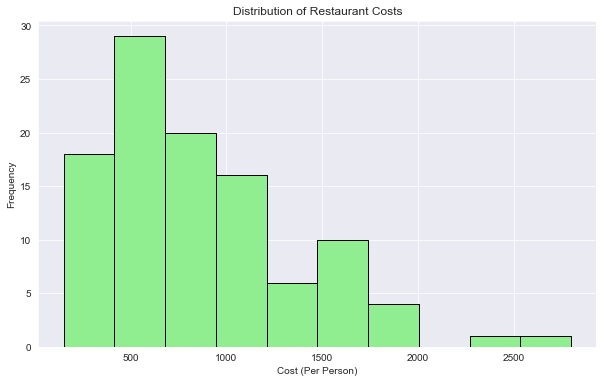

In [89]:
# Chart - 2 visualization code

# Visualization: Histogram of restaurant costs
plt.figure(figsize=(10, 6))
plt.hist(restaurant_data['Cost'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Restaurant Costs')
plt.xlabel('Cost (Per Person)')
plt.ylabel('Frequency')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a histogram to visualize the distribution of restaurant costs. A histogram is suitable for displaying the frequency or distribution of a continuous variable, such as the cost of dining at restaurants. It helps us understand the range and distribution of costs and identify any patterns or outliers.



##### 2. What is/are the insight(s) found from the chart?

Most of the Restaurants have lower cost per person , there are few that charges for premium.

##### 3. Will the gained insights help creating a positive business impact? 


 By analyzing the cost distribution, they can identify the most common price range that aligns with customer preferences and market trends.

#### Chart - 3

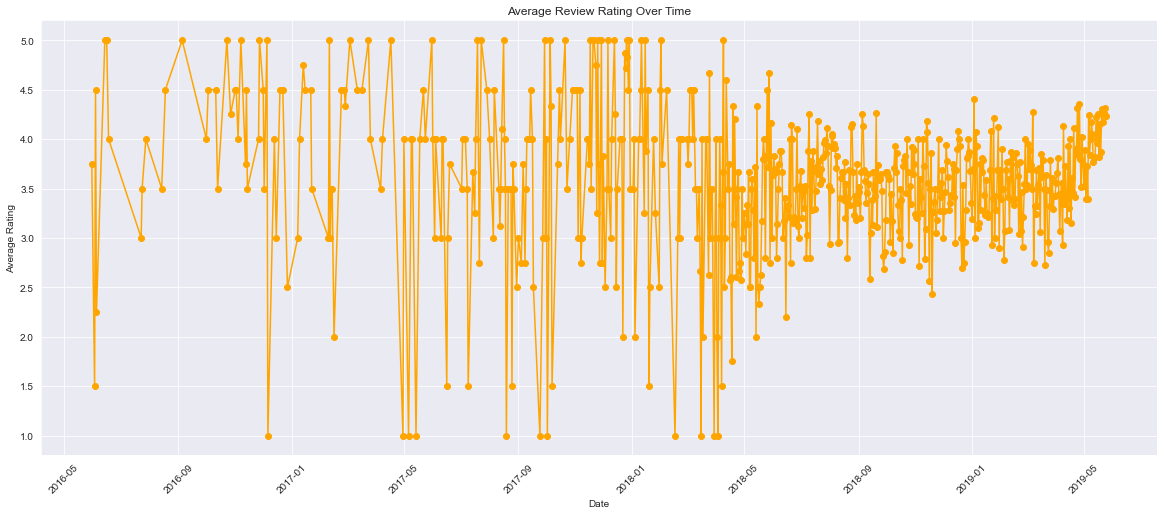

In [124]:
# Chart - 3 visualization code

# Group by date and calculate the average rating
rating_counts = review_data.groupby('Date')['Rating'].mean()

# Create a line chart
plt.figure(figsize=(20, 8))
plt.plot(rating_counts.index, rating_counts.values, color='orange', marker='o')
plt.title('Average Review Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

I chose a line chart to visualize the average review rating over time. A line chart is effective for showing the trend or pattern of a continuous variable across different time points. In this case, we are interested in understanding how the average review rating has changed over time.

##### 2. What is/are the insight(s) found from the chart?

There is no particular pattern but we can observe after 2018-05 ratings havn't dropped below 2.0.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Monitoring and analyzing the trend in customer ratings allows businesses to assess their overall performance and identify areas for improvement. 

#### Chart - 4

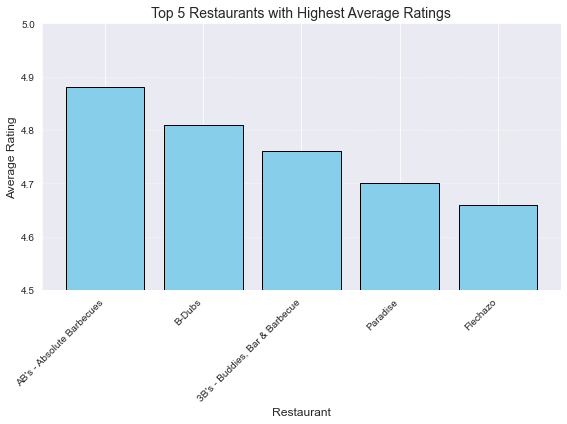

In [129]:
# Chart - 4 visualization code

# Calculate the average rating for each restaurant
average_ratings = review_data.groupby('Restaurant')['Rating'].mean()

# Sort the restaurants by average rating in descending order and select top 5
top_5_restaurants = average_ratings.nlargest(5)

# Create a bar chart with improved aesthetics
plt.figure(figsize=(8, 6))
plt.bar(top_5_restaurants.index, top_5_restaurants.values, color='skyblue', edgecolor='black')

plt.xlabel('Restaurant', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.title('Top 5 Restaurants with Highest Average Ratings', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(4.5, 5.0)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the top 5 restaurants with the highest average ratings. A bar chart is an effective way to compare different categories or entities based on a specific metric, in this case, the average rating of each restaurant. The length of each bar represents the average rating, allowing for easy comparison between the restaurants.

##### 2. What is/are the insight(s) found from the chart?

By examining the heights of the bars, we can quickly identify which restaurants have the highest average ratings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact. Knowing which restaurants have the highest average ratings is valuable information for various stakeholders. For the restaurants themselves, it provides recognition for their quality and positive customer experiences.

#### Chart - 5

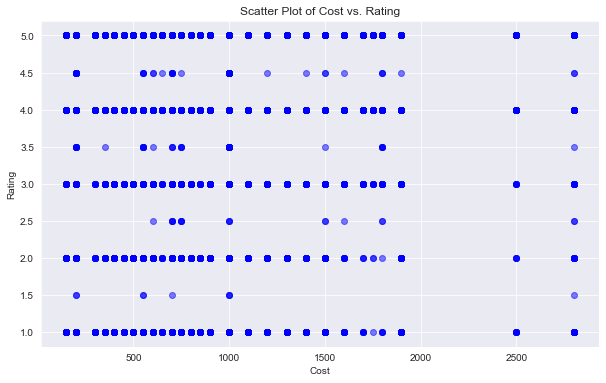

In [134]:
# Chart - 5 visualization code

# Create a scatter plot of cost vs. ratings
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Cost'], merged_data['Rating'], color='b', alpha=0.5)

plt.xlabel('Cost')
plt.ylabel('Rating')
plt.title('Scatter Plot of Cost vs. Rating')

plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatter plot to visualize the relationship between cost and ratings of restaurants. A scatter plot is suitable for examining the correlation or pattern between two continuous variables.

##### 2. What is/are the insight(s) found from the chart?

There is no particular trend.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 Understanding the relationship between cost and ratings is crucial for restaurants. It provides insights into how customers perceive the value they receive in relation to the cost they pay. By analyzing the scatter plot, restaurants can assess whether their pricing aligns with customer expectations and satisfaction. They can make informed decisions about adjusting their pricing strategy to optimize customer satisfaction and business profitability.

#### Chart - 6

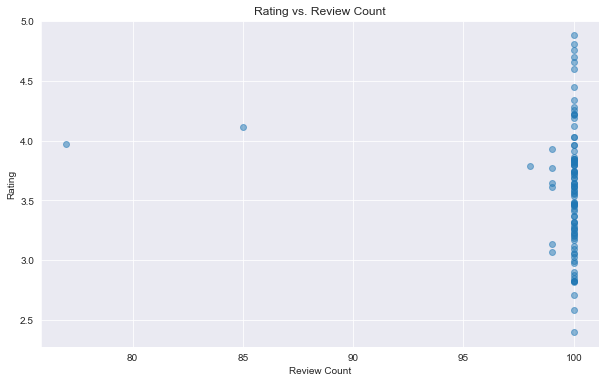

In [151]:
# Chart - 6 visualization code

# Calculate review count for each restaurant
review_count = review_data['Restaurant'].value_counts().reset_index()
review_count.columns = ['Restaurant', 'Review Count']
average_ratings = average_ratings.reset_index()

# Merge review count with average rating

rating_review_count = pd.merge(review_count, average_ratings, on='Restaurant')

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(rating_review_count['Review Count'], rating_review_count['Rating'], alpha=0.5)
plt.title('Rating vs. Review Count')
plt.xlabel('Review Count')
plt.ylabel('Rating')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a scatter plot to visualize the relationship between the review count and ratings of restaurants. A scatter plot is suitable for examining the correlation or pattern between two continuous variables.

##### 2. What is/are the insight(s) found from the chart?

There is no particular  relationship between these two columns.

##### 3. Will the gained insights help creating a positive business impact? 


Understanding the relationship between review count and ratings is important for restaurants. It provides insights into how the popularity and feedback from customers relate to the overall rating of a restaurant. By analyzing the scatter plot, restaurants can assess how the number of reviews impacts their rating and reputation.

#### Chart - 7

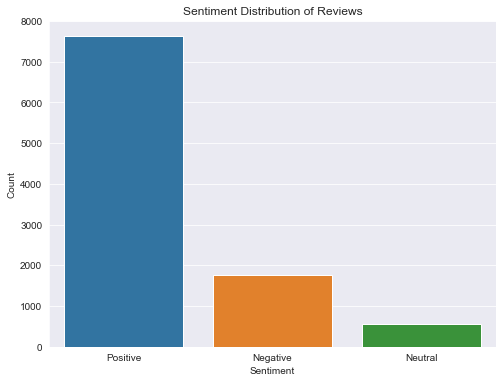

In [225]:
# Chart - 7 visualization code

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sentiment_Label'1)
plt.title('Sentiment Distribution of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

I chose a countplot to visualize the distribution of sentiments in the reviews. A countplot is suitable for visualizing the frequency or count of categorical variables. In this case, we are interested in understanding the distribution of different sentiments in the reviews.



##### 2. What is/are the insight(s) found from the chart?

The countplot displays the number of reviews belonging to each sentiment category. Positive reviews are highest in number , followed by neagative then neutral.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact. Understanding the sentiment distribution of reviews is crucial for businesses to gauge customer feedback and satisfaction. By analyzing the countplot, businesses can assess the overall sentiment of customers towards their products or services.

#### Chart - 8

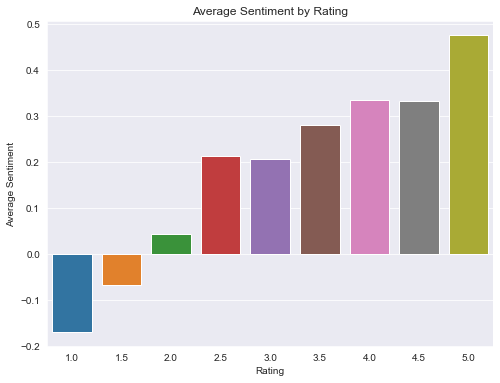

In [226]:
# Chart - 8 visualization code

# Plot average sentiment by rating
avg_sentiment = df.groupby('Rating')['Sentiment'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=avg_sentiment, x='Rating', y='Sentiment')
plt.title('Average Sentiment by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Sentiment')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

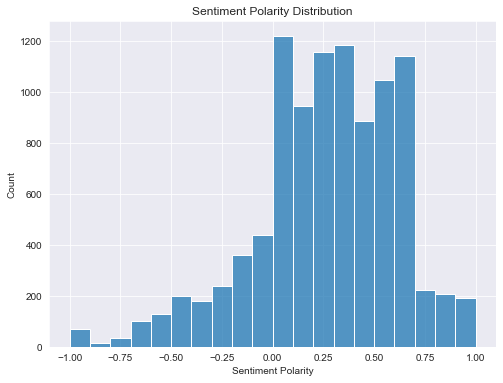

In [228]:
# Chart - 9 visualization code

# Plot sentiment polarity distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Sentiment', bins=20)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

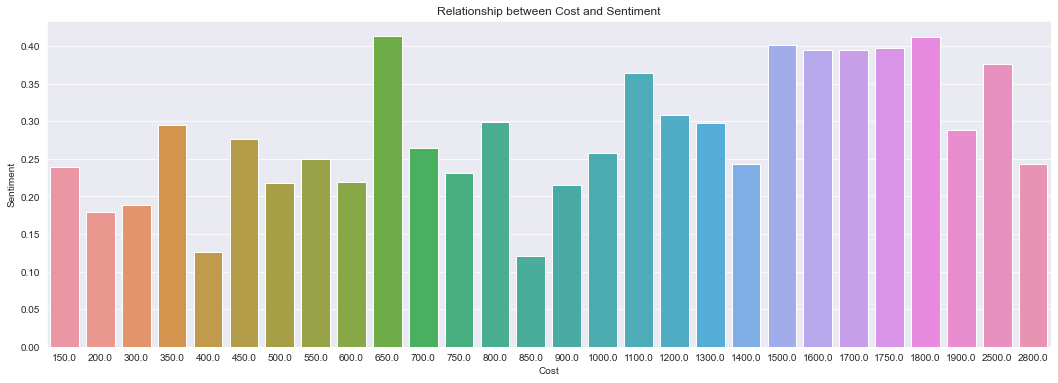

In [241]:
# Chart - 10 visualization code

# Relationship between Cost and Sentiment
avg_sentiment_for_cost = rest_sent.groupby('Cost')['Sentiment'].mean().reset_index()

plt.figure(figsize=(18, 6))
sns.barplot(x='Cost', y='Sentiment', data=avg_sentiment_for_cost)
plt.ylabel('Sentiment')
plt.xlabel('Cost')
plt.title('Relationship between Cost and Sentiment')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

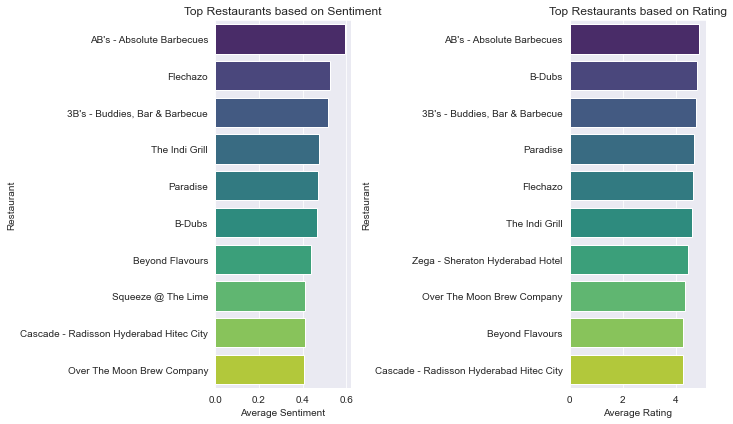

In [242]:
# Chart - 11 visualization code

# Top Restaurants based on Sentiment
top_restaurants_sentiment = df.groupby('Restaurant')['Sentiment'].mean().sort_values(ascending=False).head(10)

# Top Restaurants based on Rating
top_restaurants_rating = df.groupby('Restaurant')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))

# Plotting the bar plot for Sentiment
plt.subplot(1, 2, 1)
sns.barplot(x=top_restaurants_sentiment.values, y=top_restaurants_sentiment.index, palette='viridis')
plt.xlabel('Average Sentiment')
plt.ylabel('Restaurant')
plt.title('Top Restaurants based on Sentiment')

# Plotting the bar plot for Rating
plt.subplot(1, 2, 2)
sns.barplot(x=top_restaurants_rating.values, y=top_restaurants_rating.index, palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Restaurant')
plt.title('Top Restaurants based on Rating')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

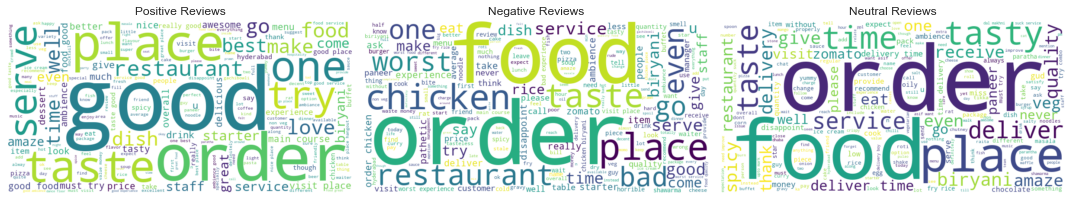

In [243]:
# Chart - 12 visualization code

from wordcloud import WordCloud

# Filter reviews based on sentiment label
positive_reviews = df[df['Sentiment_Label'] == 'Positive']['lemmatized']
negative_reviews = df[df['Sentiment_Label'] == 'Negative']['lemmatized']
neutral_reviews = df[df['Sentiment_Label'] == 'Neutral']['lemmatized']

# Create word cloud for positive reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))

# Create word cloud for negative reviews
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_reviews))

# Create word cloud for neutral reviews
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(neutral_reviews))

# Plot word clouds
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(positive_wordcloud, interpolation='bilinear')
axes[0].set_title('Positive Reviews')
axes[0].axis('off')
axes[1].imshow(negative_wordcloud, interpolation='bilinear')
axes[1].set_title('Negative Reviews')
axes[1].axis('off')
axes[2].imshow(neutral_wordcloud, interpolation='bilinear')
axes[2].set_title('Neutral Reviews')
axes[2].axis('off')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

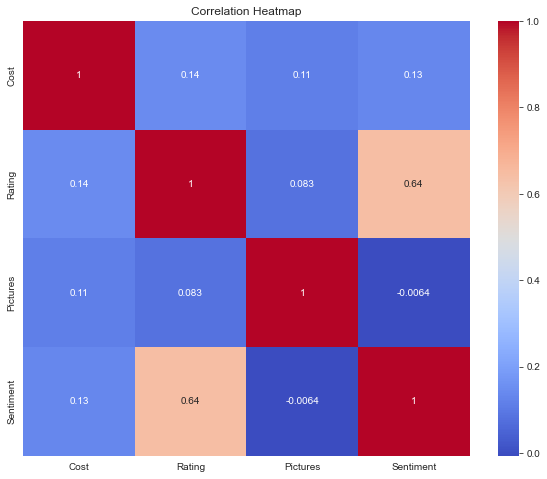

In [245]:
# Correlation Heatmap visualization code

# Select the numerical columns for correlation analysis
numerical_columns = rest_sent.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Generate the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

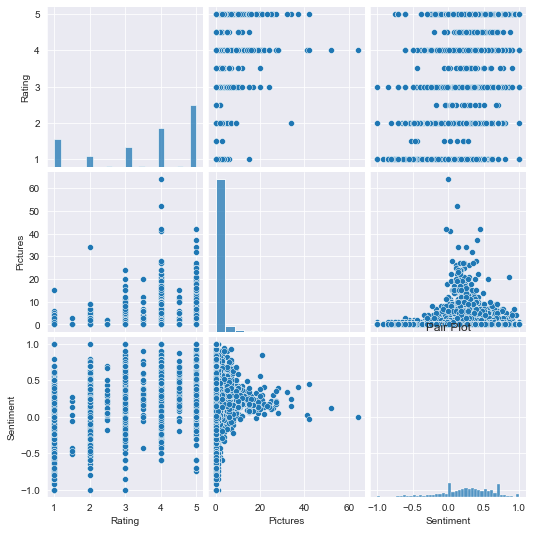

In [246]:
# Pair Plot visualization code

# Select the numerical columns for the pair plot
numerical_columns = df.select_dtypes(include='number')

# Create the pair plot
sns.pairplot(numerical_columns)
plt.title('Pair Plot')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The average customer ratings for high-cost and low-cost restaurants are the same.

Alternate Hypothesis (H1): The average customer ratings for high-cost and low-cost restaurants are different.

#### 2. Perform an appropriate statistical test.

In [250]:
rest_sent['Cost'].quantile(0.8)
# Assuming price more than 80th percentile as high

1300.0

In [251]:
# Perform Statistical Test to obtain P-Value

import scipy.stats as stats

# Define the high-cost and low-cost restaurant groups
high_cost_ratings = rest_sent[rest_sent['Cost'] >= 1300]['Rating']
low_cost_ratings = rest_sent[rest_sent['Cost'] <= 1300]['Rating']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(high_cost_ratings, low_cost_ratings)

# Define the significance level
alpha = 0.05

# Print the results
print('t-statistic:', t_stat)
print('p-value:', p_value)

# Determine the outcome based on the p-value
if p_value < alpha:
    print('Reject the null hypothesis')
    print('The average customer ratings for high-cost and low-cost restaurants are significantly different.')
else:
    print('Fail to reject the null hypothesis')
    print('The average customer ratings for high-cost and low-cost restaurants are not significantly different.')


t-statistic: 12.79780087987529
p-value: 3.2271904819517947e-37
Reject the null hypothesis
The average customer ratings for high-cost and low-cost restaurants are significantly different.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no relationship between the cost of food and the sentiment of reviews.

Alternate Hypothesis (H1): There is a relationship between the cost of food and the sentiment of reviews.



#### 2. Perform an appropriate statistical test.

In [252]:
# Perform Statistical Test to obtain P-Value


# Extract the relevant data
cost = rest_sent['Cost']
sentiment = rest_sent['Sentiment']

# Perform Pearson's correlation coefficient test
correlation, p_value = stats.pearsonr(cost, sentiment)

# Define the significance level
alpha = 0.05

# Print the results
print('Correlation coefficient:', correlation)
print('p-value:', p_value)

# Determine the outcome based on the p-value
if p_value < alpha:
    print('Reject the null hypothesis')
    print('There is a correlation between the cost of food and the average sentiment of the reviews.')
else:
    print('Fail to reject the null hypothesis')
    print('There is no correlation between the cost of food and the average sentiment of the reviews.')


Correlation coefficient: 0.13192166431732313
p-value: 6.913076140590849e-40
Reject the null hypothesis
There is a correlation between the cost of food and the average sentiment of the reviews.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the average rating given by critics and non-critics.

Alternate Hypothesis (H1): There is a significant difference in the average rating given by critics and non-critics.


#### 2. Perform an appropriate statistical test.

In [285]:
# Calculate the average rating for critics and non-critics
average_rating_critics = review_data.loc[review_data['Is_Critic'] == 1, 'Rating']
average_rating_non_critics = review_data.loc[review_data['Is_Critic'] == 0, 'Rating']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(average_rating_critics, average_rating_non_critics, equal_var=False)

# Define the significance level
alpha = 0.05

# Print the results
print('t-statistic:', t_statistic)
print('p-value:', p_value)

# Determine the outcome based on the p-value
if p_value < alpha:
    print('Reject the null hypothesis')
    print('There is a significant difference in the average rating given by critics and non-critics.')
else:
    print('Fail to reject the null hypothesis')
    print('There is no significant difference in the average rating given by critics and non-critics.')


t-statistic: 4.956286596483873
p-value: 8.272878517546226e-07
Reject the null hypothesis
There is a significant difference in the average rating given by critics and non-critics.


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [290]:
restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      105 non-null    object 
 1   Links     105 non-null    object 
 2   Cost      105 non-null    float64
 3   Cuisines  105 non-null    object 
 4   Timings   104 non-null    object 
dtypes: float64(1), object(4)
memory usage: 4.2+ KB


In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Restaurant       9954 non-null   object        
 1   Reviewer         9954 non-null   object        
 2   Review           9954 non-null   object        
 3   Rating           9954 non-null   float64       
 4   Metadata         9954 non-null   object        
 5   Time             9954 non-null   datetime64[ns]
 6   Pictures         9954 non-null   int64         
 7   Date             9954 non-null   datetime64[ns]
 8   clean_review     9954 non-null   object        
 9   tokens           9954 non-null   object        
 10  lemmatized       9954 non-null   object        
 11  Sentiment        9954 non-null   float64       
 12  Sentiment_Label  9954 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(8)
memory usage: 1.3+ MB


In [302]:
# from restaurant_data we need Name,Cost,Cuisines

restaurant = restaurant_data[['Name','Cost','Cuisines']]
restaurant

,Name,Cost,Cuisines
0,Beyond Flavours,800.0,"Chinese, Continental, Kebab, European, South Indian, North Indian"
1,Paradise,800.0,"Biryani, North Indian, Chinese"
2,Flechazo,1300.0,"Asian, Mediterranean, North Indian, Desserts"
3,Shah Ghouse Hotel & Restaurant,800.0,"Biryani, North Indian, Chinese, Seafood, Beverages"
4,Over The Moon Brew Company,1200.0,"Asian, Continental, North Indian, Chinese, Mediterranean"
...,...,...,...
100,IndiBlaze,600.0,"Fast Food, Salad"
101,Sweet Basket,200.0,"Bakery, Mithai"
102,Angaara Counts 3,500.0,"North Indian, Biryani, Chinese"
103,Wich Please,250.0,Fast Food


In [304]:
# Manipulate Features to minimize feature correlation and create new features

# from df we need restaurant,number of reviews , avg_rating, avg_Sentiment

review = df.groupby('Restaurant').agg({'Review': 'count', 'Rating': 'mean' ,'Sentiment': 'mean'}).reset_index()
review

,Restaurant,Review,Rating,Sentiment
0,10 Downing Street,100,3.80,0.328252
1,13 Dhaba,100,3.48,0.249855
2,"3B's - Buddies, Bar & Barbecue",100,4.76,0.516929
3,AB's - Absolute Barbecues,100,4.88,0.592043
4,Absolute Sizzlers,100,3.62,0.275626
...,...,...,...,...
95,Urban Asia - Kitchen & Bar,100,3.65,0.242699
96,Yum Yum Tree - The Arabian Food Court,100,3.56,0.218138
97,Zega - Sheraton Hyderabad Hotel,100,4.45,0.398009
98,Zing's Northeast Kitchen,100,3.65,0.197837


#### 2. Feature Selection

In [328]:
# Select your features wisely to avoid overfitting

data = pd.merge(restaurant,review, left_on = 'Name',right_on='Restaurant')
data.drop('Restaurant',inplace = True,axis=1)
#data = data[['Name','Cost','Cuisines','Review','Rating','Sentiment']]
data

,Name,Cost,Cuisines,Review,Rating,Sentiment
0,Beyond Flavours,800.0,"Chinese, Continental, Kebab, European, South Indian, North Indian",100,4.280,0.439958
1,Paradise,800.0,"Biryani, North Indian, Chinese",100,4.700,0.472151
2,Flechazo,1300.0,"Asian, Mediterranean, North Indian, Desserts",100,4.660,0.525033
3,Shah Ghouse Hotel & Restaurant,800.0,"Biryani, North Indian, Chinese, Seafood, Beverages",100,3.210,0.166361
4,Over The Moon Brew Company,1200.0,"Asian, Continental, North Indian, Chinese, Mediterranean",100,4.340,0.407802
...,...,...,...,...,...,...
95,Desi Bytes,400.0,"North Indian, Chinese",100,2.900,0.168750
96,Hyderabadi Daawat,600.0,"Hyderabadi, Chinese, Mughlai",100,3.830,0.269496
97,Zega - Sheraton Hyderabad Hotel,1750.0,"Asian, Sushi",100,4.450,0.398009
98,Triptify,400.0,North Indian,100,3.550,0.244531


In [329]:
data['Cuisines'] = data['Cuisines'].str.split(',')
data

,Name,Cost,Cuisines,Review,Rating,Sentiment
0,Beyond Flavours,800.0,"[Chinese, Continental, Kebab, European, South Indian, North Indian]",100,4.280,0.439958
1,Paradise,800.0,"[Biryani, North Indian, Chinese]",100,4.700,0.472151
2,Flechazo,1300.0,"[Asian, Mediterranean, North Indian, Desserts]",100,4.660,0.525033
3,Shah Ghouse Hotel & Restaurant,800.0,"[Biryani, North Indian, Chinese, Seafood, Beverages]",100,3.210,0.166361
4,Over The Moon Brew Company,1200.0,"[Asian, Continental, North Indian, Chinese, Mediterranean]",100,4.340,0.407802
...,...,...,...,...,...,...
95,Desi Bytes,400.0,"[North Indian, Chinese]",100,2.900,0.168750
96,Hyderabadi Daawat,600.0,"[Hyderabadi, Chinese, Mughlai]",100,3.830,0.269496
97,Zega - Sheraton Hyderabad Hotel,1750.0,"[Asian, Sushi]",100,4.450,0.398009
98,Triptify,400.0,[North Indian],100,3.550,0.244531


In [330]:
# Apply one-hot encoding to Cuisines column

from sklearn.preprocessing import MultiLabelBinarizer


mlb = MultiLabelBinarizer()
encoded_cuisines = pd.DataFrame(mlb.fit_transform(data['Cuisines']), columns=mlb.classes_)

# Concatenate encoded cuisines with original DataFrame
data = pd.concat([data, encoded_cuisines], axis=1)

data.drop('Cuisines',inplace = True,axis =1)
data

,Name,Cost,Review,Rating,Sentiment,American,Andhra,Arabian,Asian,BBQ,...,Mediterranean,Mexican,Modern Indian,Momos,Mughlai,North Eastern,North Indian,Seafood,South Indian,Street Food
0,Beyond Flavours,800.0,100,4.280,0.439958,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Paradise,800.0,100,4.700,0.472151,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Flechazo,1300.0,100,4.660,0.525033,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,800.0,100,3.210,0.166361,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Over The Moon Brew Company,1200.0,100,4.340,0.407802,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Desi Bytes,400.0,100,2.900,0.168750,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
96,Hyderabadi Daawat,600.0,100,3.830,0.269496,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,Zega - Sheraton Hyderabad Hotel,1750.0,100,4.450,0.398009,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,Triptify,400.0,100,3.550,0.244531,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [346]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
data.head(3)

,Name,Cost,Review,Rating,Sentiment,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,Cafe,Chinese,Continental,Desserts,European,Fast Food,Finger Food,Goan,Hyderabadi,Indonesian,Italian,Japanese,Juices,Kebab,Mediterranean,Modern Indian,Momos,Mughlai,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Sushi,Thai,Wraps,American,Andhra,Arabian,Asian,BBQ,Bakery,Biryani,Burger,Cafe,Chinese,Continental,Desserts,European,Fast Food,Finger Food,Healthy Food,Hyderabadi,Ice Cream,Italian,Kebab,Lebanese,Mediterranean,Mexican,Modern Indian,Momos,Mughlai,North Eastern,North Indian,Seafood,South Indian,Street Food
0,Beyond Flavours,800.0,100,4.28,0.439958,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Paradise,800.0,100,4.70,0.472151,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Flechazo,1300.0,100,4.66,0.525033,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

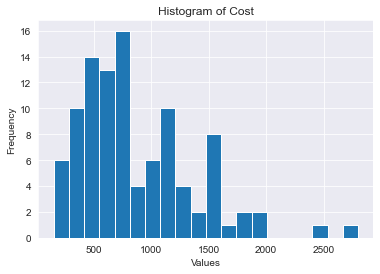

Skewness of Cost: 1.1681249405432688


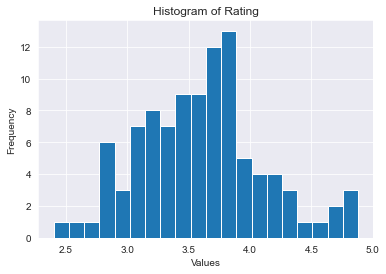

Skewness of Rating: 0.27960847488563345


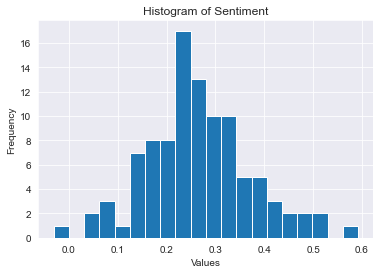

Skewness of Sentiment: 0.29351327132196314


In [353]:
# Assuming 'data' is your DataFrame and 'column_name' is the column to check and transform

columns = ['Cost','Rating','Sentiment']
for column_name in columns:
    column = data[column_name]

    # Plot the histogram to visualize the distribution
    plt.hist(column, bins=20)
    plt.title('Histogram of ' + column_name)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.show()

    # Calculate the skewness of the column
    skewness = column.skew()
    print('Skewness of', column_name + ':', skewness)


In [ ]:
# Transform Your data

### 6. Data Scaling

In [386]:
# Scaling your data

from sklearn.preprocessing import MinMaxScaler

# Select the columns to be scaled
columns_to_scale = ['Cost', 'Review', 'Rating', 'Sentiment']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the selected columns and transform the data
scaled_data = scaler.fit_transform(data[columns_to_scale])

# Create a new DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Concatenate the scaled columns with the remaining columns in the original dataset
final_df = pd.concat([data.drop(columns=columns_to_scale), scaled_df], axis=1)

final_df

,Name,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,Cafe,Chinese,Continental,Desserts,European,Fast Food,Finger Food,Goan,Hyderabadi,Indonesian,Italian,Japanese,Juices,Kebab,Mediterranean,Modern Indian,Momos,Mughlai,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Sushi,Thai,Wraps,American,Andhra,Arabian,Asian,BBQ,Bakery,Biryani,Burger,Cafe,Chinese,Continental,Desserts,European,Fast Food,Finger Food,Healthy Food,Hyderabadi,Ice Cream,Italian,Kebab,Lebanese,Mediterranean,Mexican,Modern Indian,Momos,Mughlai,North Eastern,North Indian,Seafood,South Indian,Street Food,Cost,Review,Rating,Sentiment
0,Beyond Flavours,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.245283,1.0,0.758065,0.755966
1,Paradise,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.245283,1.0,0.927419,0.807624
2,Flechazo,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.433962,1.0,0.911290,0.892477
3,Shah Ghouse Hotel & Restaurant,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.245283,1.0,0.326613,0.316955
4,Over The Moon Brew Company,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.396226,1.0,0.782258,0.704369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Desi Bytes,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.094340,1.0,0.201613,0.320789
96,Hyderabadi Daawat,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.169811,1.0,0.576613,0.482445
97,Zega - Sheraton Hyderabad Hotel,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.603774,1.0,0.826613,0.688656
98,Triptify,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.094340,1.0,0.463710,0.442387


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [398]:
# Split your data to train and test. Choose Splitting ratio wisely.

from sklearn.model_selection import train_test_split

X = final_df.copy()
X.set_index('Name',inplace = True)
X


,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,Cafe,Chinese,Continental,Desserts,European,Fast Food,Finger Food,Goan,Hyderabadi,Indonesian,Italian,Japanese,Juices,Kebab,Mediterranean,Modern Indian,Momos,Mughlai,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Sushi,Thai,Wraps,American,Andhra,Arabian,Asian,BBQ,Bakery,Biryani,Burger,Cafe,Chinese,Continental,Desserts,European,Fast Food,Finger Food,Healthy Food,Hyderabadi,Ice Cream,Italian,Kebab,Lebanese,Mediterranean,Mexican,Modern Indian,Momos,Mughlai,North Eastern,North Indian,Seafood,South Indian,Street Food,Cost,Review,Rating,Sentiment
Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Beyond Flavours,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.245283,1.0,0.758065,0.755966
Paradise,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.245283,1.0,0.927419,0.807624
Flechazo,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.433962,1.0,0.911290,0.892477
Shah Ghouse Hotel & Restaurant,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.245283,1.0,0.326613,0.316955
Over The Moon Brew Company,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.396226,1.0,0.782258,0.704369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Desi Bytes,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.094340,1.0,0.201613,0.320789
Hyderabadi Daawat,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.169811,1.0,0.576613,0.482445
Zega - Sheraton Hyderabad Hotel,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.603774,1.0,0.826613,0.688656


In [447]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

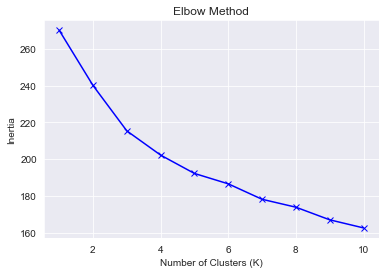

In [373]:
# ML Model - 1 Implementation

from sklearn.cluster import KMeans

# Initialize an empty list to store the within-cluster sum of squares (inertia) for different K values
inertia = []

# Define a range of K values to try
k_values = range(1, 11)

# Fit K-means for each K value and compute the inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the inertia values against the number of clusters
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [449]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming you have your data stored in the 'data' variable

max_clusters = 11  # Maximum number of clusters to try
best_score = -1  # Initialize the best silhouette score

# Iterate over different numbers of clusters
for n_clusters in range(2, max_clusters+1):
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters)
    clusters = kmeans.fit_predict(X_pca)
    
    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X_pca, clusters)
    
    # Check if the current score is better than the previous best score
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_clusters = clusters
        best_n_clusters = n_clusters

# Print the best number of clusters and its corresponding silhouette score
print("Best number of clusters:", best_n_clusters)
print("Silhouette Score:", best_score)


Best number of clusters: 6
Silhouette Score: 0.7663343744377237


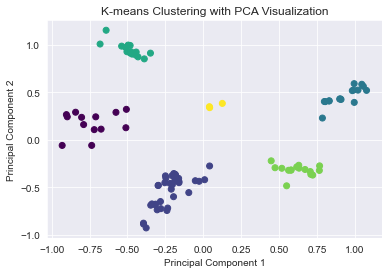

In [450]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Instantiate the K-means algorithm with the desired number of clusters
kmeans = KMeans(n_clusters=6)

# Fit the K-means algorithm on the dataset
kmeans.fit(X_pca)

# Get the cluster labels for each data point
labels = kmeans.labels_


# Visualize the clusters
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with PCA Visualization')
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [445]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Initialize variables to store the optimal number of clusters and its corresponding silhouette score
optimal_num_clusters = 0
max_silhouette_score = -1

# Set the range of the number of clusters to try
min_clusters = 2
max_clusters = 11

# Iterate over the range of clusters
for num_clusters in range(min_clusters, max_clusters+1):
    # Perform Agglomerative Clustering with the current number of clusters
    agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
    cluster_labels = agg_clustering.fit_predict(X_pca)

    # Calculate the silhouette score for the current clustering
    silhouette_avg = silhouette_score(X_pca, cluster_labels)

    # Check if the current silhouette score is higher than the previous maximum
    if silhouette_avg > max_silhouette_score:
        max_silhouette_score = silhouette_avg
        optimal_num_clusters = num_clusters

# Print the optimal number of clusters
print("Optimal number of clusters:", optimal_num_clusters)
print("Silhouette Score:", max_silhouette_score)


Optimal number of clusters: 6
Silhouette Score: 0.7663343744377237


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

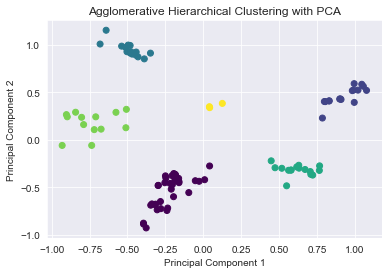

Number of clusters: 6


In [446]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform Agglomerative Clustering with the optimal number of clusters
num_clusters = 6
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
cluster_labels = agg_clustering.fit_predict(X_pca)

# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Agglomerative Hierarchical Clustering with PCA')
plt.show()

# Print the number of clusters
print("Number of clusters:", num_clusters)


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

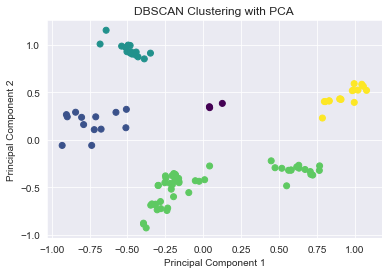

Number of clusters: 4


In [455]:
# ML Model - 3 Implementation
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels = dbscan.fit_predict(X_pca)

# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering with PCA')
plt.show()

# Print the number of clusters (excluding noise points)
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print("Number of clusters:", num_clusters)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

In [456]:
# Initialize the models
kmeans = KMeans(n_clusters=6)
agglomerative = AgglomerativeClustering(n_clusters=6)
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the models
kmeans.fit(X_pca)
agglomerative.fit(X_pca)
dbscan.fit(X_pca)

# Predict cluster labels
kmeans_labels = kmeans.labels_
agglomerative_labels = agglomerative.labels_
dbscan_labels = dbscan.labels_

# Calculate Silhouette Score
kmeans_score = silhouette_score(X_pca, kmeans_labels)
agglomerative_score = silhouette_score(X_pca, agglomerative_labels)
dbscan_score = silhouette_score(X_pca, dbscan_labels)

# Print the Silhouette Scores
print("K-means Silhouette Score:", kmeans_score)
print("Agglomerative Clustering Silhouette Score:", agglomerative_score)
print("DBSCAN Silhouette Score:", dbscan_score)


K-means Silhouette Score: 0.7663343744377237
Agglomerative Clustering Silhouette Score: 0.7663343744377237
DBSCAN Silhouette Score: 0.5880847682155657


## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***